In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#lendo a base de dados
dados = pd.read_excel('./database/filmes.xlsx')

display(dados.head())

,Cenas de Luta,Nível de Humor,Passa no Futuro,Orçamento,Público Alvo,Baseado em Fatos Reais,Tem Música Marcante,Gênero
0,Sim,Baixo,Não,Alto,Adulto,Não,Sim,Ação
1,Não,Alto,Não,Médio,Jovem,Não,Sim,Comédia
2,Sim,Baixo,Sim,Alto,Jovem,Não,Sim,Ficção Científica
3,Sim,Médio,Não,Médio,Jovem,Sim,Não,Ação
4,Não,Alto,Não,Baixo,Infantil,Não,Sim,Comédia


In [149]:
# Explorando os dados

# 1 - total de filmes incluidos no dataset
display(f'Total de filmes: {dados.shape[0]}')

# 2 - Caracteristicas para descrever os filmes
display(f'Caracteristicas: {dados.columns.tolist()}')

# 3 - Generos presentes no dataset
generos = dados['Gênero'].str.split(',', expand=True).stack().unique().tolist()
display(f'Gêneros: {generos}')



'Total de filmes: 18'

"Caracteristicas: ['Cenas de Luta', 'Nível de Humor', 'Passa no Futuro', 'Orçamento', 'Público Alvo', 'Baseado em Fatos Reais', 'Tem Música Marcante', 'Gênero']"

"Gêneros: ['Ação', 'Comédia', 'Ficção Científica']"

In [150]:
column_name = "Gênero"

dados.columns.get_loc(column_name)

column_number = dados.columns.get_loc(column_name)

atributos = dados.drop('Gênero', axis=1)
resposta = dados['Gênero']

df_atributos = pd.DataFrame(atributos)
df_resposta = pd.DataFrame(resposta)

display(df_atributos.head())
display(df_resposta.head())


,Cenas de Luta,Nível de Humor,Passa no Futuro,Orçamento,Público Alvo,Baseado em Fatos Reais,Tem Música Marcante
0,Sim,Baixo,Não,Alto,Adulto,Não,Sim
1,Não,Alto,Não,Médio,Jovem,Não,Sim
2,Sim,Baixo,Sim,Alto,Jovem,Não,Sim
3,Sim,Médio,Não,Médio,Jovem,Sim,Não
4,Não,Alto,Não,Baixo,Infantil,Não,Sim


,Gênero
0,Ação
1,Comédia
2,Ficção Científica
3,Ação
4,Comédia


In [151]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_resposta = LabelEncoder()

resposta = LabelEncoder_resposta.fit_transform(resposta)
df_respota = pd.DataFrame(resposta)
display(df_respota)

,0
0,0
1,1
2,2
3,0
4,1
5,2
6,0
7,1
8,2
9,0


In [158]:
df_atributos = pd.DataFrame(atributos)

label_encoder = LabelEncoder()

for col in df_atributos.columns:
    # Verifica se o tipo da coluna é string
    if df_atributos[col].dtype == object:
        df_atributos[col] = label_encoder.fit_transform(df_atributos[col])

display(df_atributos)

atributos = df_atributos.values

display(atributos)

,0,1,2,3,4,5,6
0,1,1,0,0,0,0,1
1,0,0,0,2,2,0,1
2,1,1,1,0,2,0,1
3,1,2,0,2,2,1,0
4,0,0,0,1,1,0,1
5,0,1,1,2,0,0,0
6,1,1,0,0,0,0,1
7,0,0,0,2,0,0,0
8,1,2,1,0,2,0,1
9,1,1,0,2,2,0,0


array([[1, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 2, 2, 0, 1],
       [1, 1, 1, 0, 2, 0, 1],
       [1, 2, 0, 2, 2, 1, 0],
       [0, 0, 0, 1, 1, 0, 1],
       [0, 1, 1, 2, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 2, 0, 0, 0],
       [1, 2, 1, 0, 2, 0, 1],
       [1, 1, 0, 2, 2, 0, 0],
       [0, 0, 0, 1, 2, 0, 1],
       [0, 2, 1, 2, 0, 0, 1],
       [1, 2, 0, 0, 0, 1, 1],
       [0, 0, 0, 2, 2, 0, 0],
       [1, 1, 1, 0, 0, 0, 1],
       [1, 1, 0, 2, 2, 0, 0],
       [0, 0, 0, 1, 1, 0, 1],
       [0, 1, 1, 2, 2, 0, 0]])

## 2. Divisão do Conjunto

In [153]:
from sklearn.model_selection import train_test_split

# separar em treino 75% e 25% teste 
atributos_treino,atributos_teste, resposta_treino, resposta_teste = train_test_split(atributos, resposta, test_size=0.25, random_state=0)

display(pd.DataFrame(atributos_treino))
display(pd.DataFrame(atributos_teste))

,0,1,2,3,4,5,6
0,0,0,0,1,1,0,1
1,1,1,1,0,2,0,1
2,0,0,0,1,1,0,1
3,0,1,1,2,2,0,0
4,1,1,0,2,2,0,0
5,0,0,0,2,0,0,0
6,0,0,0,2,2,0,0
7,0,2,1,2,0,0,1
8,1,2,0,2,2,1,0
9,1,1,0,0,0,0,1


,0,1,2,3,4,5,6
0,0,0,0,2,2,0,1
1,1,1,0,0,0,0,1
2,1,2,1,0,2,0,1
3,0,0,0,1,2,0,1
4,1,1,1,0,0,0,1


In [154]:
from sklearn.naive_bayes import GaussianNB

#criar o classificador
classificador_bayes = GaussianNB()

#treinar o classificador, .fit literalmente treina, aqui estamos aplicando a fórmula da previsão
classificacao_treino = classificador_bayes.fit(atributos_treino, resposta_treino)

# testar o classificador, .predict faz previsoes, estamos implementando
classificacao_resposta = classificador_bayes.predict(atributos_teste)


In [155]:
# avaliar o classificador
from sklearn.metrics import accuracy_score, confusion_matrix 

# avaliar a acuracia
taxa_de_acerto = accuracy_score(resposta_teste, classificacao_resposta) # retorna entre 1 e 0 referente a taxa de acerto
print("taxa de acerto %: ", taxa_de_acerto*100)

taxa de acerto %:  100.0


[[1 0 0]
 [0 2 0]
 [0 0 2]]


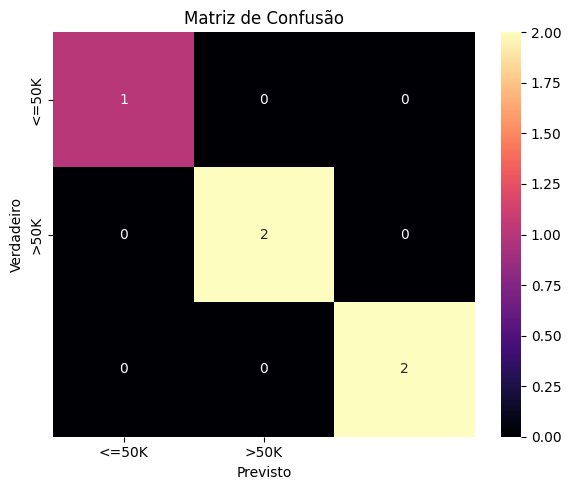

In [156]:
matriz_confusao = confusion_matrix(resposta_teste, classificacao_resposta)
print(matriz_confusao)

# Plotando -  Labels para os eixos (opcional, mas ajuda a leitura)
labels = ['<=50K', '>50K']
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='magma', 
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

In [ ]:
dt_input = pd.DataFrame(columns=[
    'Cena de luta', 
    'Nivel de Humor', 
    'Futuro', 
    'Orçamento', 
    'Publico Alvo', 
    'Baseado em Fatos Reais', 
    'Musica Marcante', 
    'Gênero'
])

for i in range(3):
    cenaLuta = input("O filme tem Cena de luta? " \
    "[1] - Sim " \
    "[2] - Não")
    if cenaLuta == '1':
        cenaLuta = "Sim"
    else:
        cenaLuta = "Não"
    nivelHumor = input("Qual o nivel de Humor? " \
    "[1] - Baixo " \
    "[2] - Médio " \
    "[3] - Alto")
    if nivelHumor == '1':
        nivelHumor = "Baixo"
    elif nivelHumor == '2':
        nivelHumor = "Médio"
    else:
        nivelHumor = "Alto"
    futuro = input("Se passa no futuro? " \
    "[1] - Sim" \
    "[2] - Não")
    if futuro == '1':
        futuro = "Sim"
    else:
        futuro = "Não"
    orcamento = input("Qual Orçamento " \
    "[1] - Baixo " \
    "[2] - Médio " \
    "[3] - Alto")
    if orcamento == '1':
        orcamento = "Baixo"
    elif orcamento == '2':
        orcamento = "Médio"
    else:
        orcamento = "Alto"
    publicoAlvo = input("Qual o publico alvo? " \
    "[1] - Infantil " \
    "[2] - Jovem " \
    "[3] - Adulto")
    if publicoAlvo == '1':
        publicoAlvo = "Infantil"
    elif publicoAlvo == '2':
        publicoAlvo = "Jovem"
    else:
        publicoAlvo = "Adulto"
    fatosReais = input("Baseado em fatos reais " \
    "[1] - Sim " \
    "[2] - Não")
    if fatosReais == '1':
        fatosReais = "Sim"
    else:
        fatosReais = "Não"
    musica = input("Tem alguma musica marcante " \
    "[1] - Sim " \
    "[2] - Não")
    if musica == '1':
        musica = "Sim"
    else:
        musica = "Não"
    genero = input("Qual genero" \
    "[1] - Ação " \
    "[2] - Comédia " \
    "[3] - Ficção Científica")
    if genero == '1':
        genero = "Ação"
    elif genero == '2':
        genero = "Comédia"
    else:
        genero = "Ficção Científica"

label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le
new_df = pd.DataFrame({
    'Cena de luta': [cenaLuta],
    'Nivel de Humor': [nivelHumor],
    'Futuro': [futuro],
    'Orçamento': [orcamento],
    'Publico Alvo': [publicoAlvo],
    'Baseado em Fatos Reais': [fatosReais],
    'Musica Marcante': [musica],
    'Gênero': [genero]
})

display(new_df)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'